<a href="https://colab.research.google.com/github/RobsonCrLira/QuarentenaDadosAlura/blob/master/Desafio_Aula_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
imdb = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv')

In [21]:
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [22]:
imdb.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

#Desafio 1
Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.


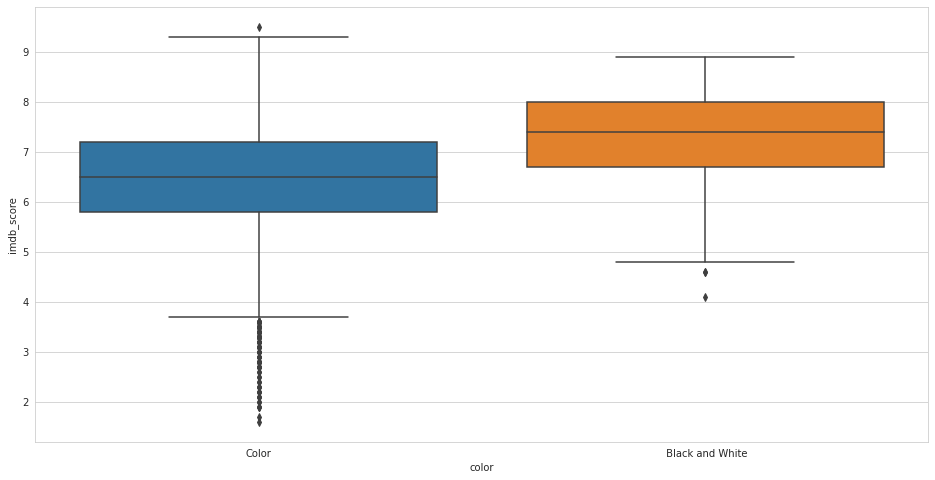

In [36]:
plt.figure(figsize=(16,8))
sns.set_style('whitegrid')
sns.boxplot(x='color', y='imdb_score',data=imdb)

Podemos ver que em filmes coloridos a media está aproximadamente entre 5.8 e 7.2 já em filmes preto e branco a media é um pouco mais alta sendo aproximadamento 6.8 ate 8.


#Desafio 2
No gráfico de budget por lucro temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

In [24]:
imdb_sem_dados_duplicados = imdb.drop_duplicates()
imdb_usa = imdb_sem_dados_duplicados.query("country == 'USA'")
imdb_usa.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


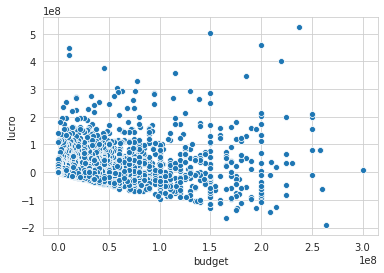

In [25]:
#Codigo copiadodo Notebook da quarentena da dados
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

budget_gross = imdb_usa.query("budget > 0 | gross > 0")[["budget", "lucro"]].dropna()

sns.scatterplot(x="budget", y="lucro", data = budget_gross)

In [33]:
imdb_usa.sort_values('lucro').head(1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


#Desafio 3
Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.


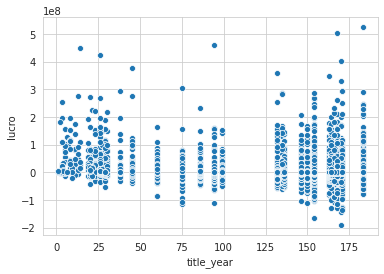

In [34]:
filmes_por_ano = imdb_usa["title_year"].value_counts()
lucro_ano = imdb_usa[["title_year", "lucro"]].set_index("title_year").join(filmes_por_ano, on="title_year")
lucro_ano.columns = ["lucro", "title_year"]
sns.scatterplot(x="title_year", y="lucro", data = lucro_ano)

In [0]:
filmes_com_menos_5_anos=imdb_usa.query('title_year > 2011')[['movie_title','num_user_for_reviews','num_critic_for_reviews','title_year','lucro']].dropna()

In [75]:
filmes_com_menos_5_anos.sort_values('lucro',ascending=False).head(10)['title_year'].value_counts()

2013.0    3
2014.0    2
2012.0    2
2015.0    2
2016.0    1
Name: title_year, dtype: int64

In [74]:
filmes_com_menos_5_anos.sort_values('lucro',ascending=False).tail(10)['title_year'].value_counts()

2013.0    3
2015.0    3
2012.0    2
2016.0    2
Name: title_year, dtype: int64

In [84]:
filmes_com_menos_5_anos.sort_values('lucro',ascending=False)['movie_title'].head(10)

29                            Jurassic World 
17                              The Avengers 
439                         The Hunger Games 
812                                 Deadpool 
186          The Hunger Games: Catching Fire 
521                          Despicable Me 2 
814                          American Sniper 
563                                  Minions 
125                                   Frozen 
207    The Hunger Games: Mockingjay - Part 1 
Name: movie_title, dtype: object

In [86]:
filmes_com_menos_5_anos.sort_values('lucro',ascending=False)['movie_title'].tail(10)

163             Gods of Egypt 
108                  Warcraft 
145                       Pan 
3879                      Pan 
14            The Lone Ranger 
62          Jupiter Ascending 
49      Jack the Giant Slayer 
85                   47 Ronin 
28                 Battleship 
5                 John Carter 
Name: movie_title, dtype: object

In [88]:
filmes_com_menos_5_anos.sort_values('lucro',ascending=False)['title_year'].head(10)

29     2015.0
17     2012.0
439    2012.0
812    2016.0
186    2013.0
521    2013.0
814    2014.0
563    2015.0
125    2013.0
207    2014.0
Name: title_year, dtype: float64

In [89]:
filmes_com_menos_5_anos.sort_values('lucro',ascending=False)['title_year'].tail(10)

163     2016.0
108     2016.0
145     2015.0
3879    2015.0
14      2013.0
62      2015.0
49      2013.0
85      2013.0
28      2012.0
5       2012.0
Name: title_year, dtype: float64

Acredito que não possa ser nada afirmado, mas podemos deduzir a grosso modo que o periodo de lancamento do filme até o fechamento da base influencia parte do lucro dos, pois um exemplo é ***Deadpool*** ele foi lançado em 2016 e teve um otimo lucro agora ***Warcraft e Gods of Egypt*** que foram lancado no mesmo ano não tiram lucro, e ao mesmo tempo temos os contras como ***The Avengers e The Hunger Games*** que tiveram um bom lucro agora ja ***John Carter Battleship*** ficaram na lanterna

#Desafio 4
Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

In [93]:
imdb_usa.query('title_year < 1940').sort_values('lucro',ascending=False)[['movie_title','lucro','title_year']].head(2)

,movie_title,lucro,title_year
3970,Gone with the Wind,194678278.0,1939.0
4449,Snow White and the Seven Dwarfs,182925485.0,1937.0


#Desafio 5 
No gráfico de filmes_irmaos por dindin temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

In [94]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


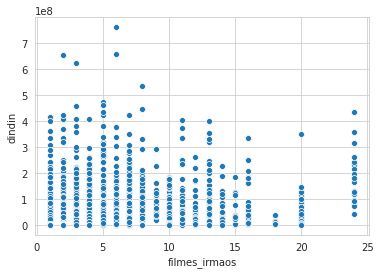

In [96]:
sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)

In [110]:
gross_director.query('filmes_irmaos > 15 and filmes_irmaos < 20')['director_name'].value_counts()

Woody Allen    18
Spike Lee      16
Tim Burton     16
Name: director_name, dtype: int64

Paulo Silveira e não é que ele acertou...

#Desafio 6
Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.


Devido a eu estar atrazado nas atiividades(sendo que o desafio 3 me tomou um bom tempo), vou deixar essa por ultimo ou  irei fazer depois que terminar os desafios da aula 4 e 5

#Desafio 7
Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

In [113]:
ano_2000 = imdb_usa.query("title_year > 2000")
ano_2000[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.708622,0.770074,0.102319
budget,0.708622,1.000000,0.095558,0.059220
lucro,0.770074,0.095558,1.000000,0.028288
title_year,0.102319,0.059220,0.028288,1.000000


In [123]:
imdb_usa[['movie_title','gross', 'budget']].head()

,movie_title,gross,budget
0,Avatar,760505847.0,237000000.0
1,Pirates of the Caribbean: At World's End,309404152.0,300000000.0
3,The Dark Knight Rises,448130642.0,250000000.0
5,John Carter,73058679.0,263700000.0
6,Spider-Man 3,336530303.0,258000000.0


Há uma correlações entre gross x budget e gross x lucro, indicando que um bom investimento proporciona um bom retorno, no entando a "teoria" pode ser diferente da "pratica", assim como vimos no Desafio 3 com **John Carter**



#Desafio 8
Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

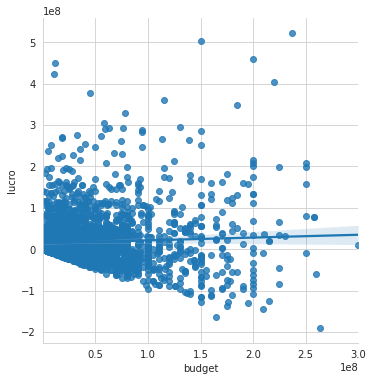

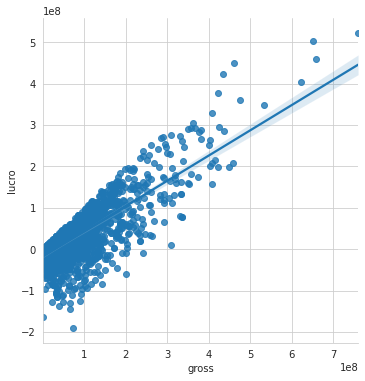

In [129]:
sns.pairplot(data = imdb_usa, y_vars='lucro', x_vars='budget', height=5, kind='reg')
sns.pairplot(data = imdb_usa, y_vars='lucro', x_vars='gross', height=5, kind='reg')

#Desafio 9

Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.

In [125]:
imdb_usa[["imdb_score","num_voted_users","num_user_for_reviews"]].corr()

,imdb_score,num_voted_users,num_user_for_reviews
imdb_score,1.000000,0.447340,0.320336
num_voted_users,0.447340,1.000000,0.797354
num_user_for_reviews,0.320336,0.797354,1.000000
